In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing the requitred datasets
val = pd.read_csv('twitter_validation.csv',header=None)
train = pd.read_csv('twitter_training.csv',header=None)

In [3]:
train.sample(5)

,0,1,2,3
84,2415,Borderlands,Positive,FUCK YESSSSSSSS .
11077,13104,Xbox(Xseries),Neutral,Interesting XBOX IS The BEST CONCSOLE is what ...
33371,6528,Fortnite,Neutral,damn fortnite was deleted from our store.
5005,60,Amazon,Neutral,Amazon Web Services Re / Start program helps p...
9469,12829,Xbox(Xseries),Positive,If last year taught.. SUPER happy that @ Xbox ...


In [4]:
train.columns = ['id','information','type','text']

In [5]:
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
# rename the columns for the validation dataset also
val.columns = ['id','information','type','text']
val.head(5)

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
train_data = train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
val_data = val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
# text transformations
train_data["lower"]=train_data['text'].str.lower() # converting the text to lower case
train_data['lower'] = train_data['lower'].apply(lambda x: str(x))
train_data['lower'] = train_data['lower'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+',' ',x))  #remove all punctuations except whitespace
val_data["lower"]=val_data['text'].str.lower()   # converting the text to lower case
val_data['lower'] = val_data['lower'].apply(lambda x: str(x))
val_data['lower'] = val_data['lower'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+',' ',x))  #remove all punctuations except whitespace


### Exploratory Data Analysis

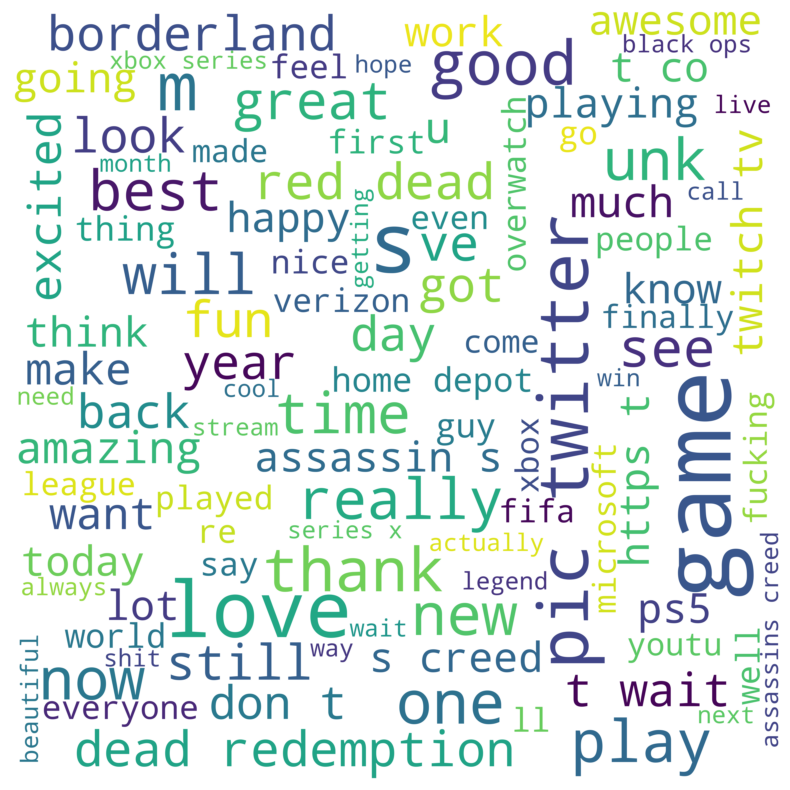

In [10]:
# creating a word cloud for type as positive
word_cloud_text = ''.join(train_data[train_data['type']=='Positive']['lower'])
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

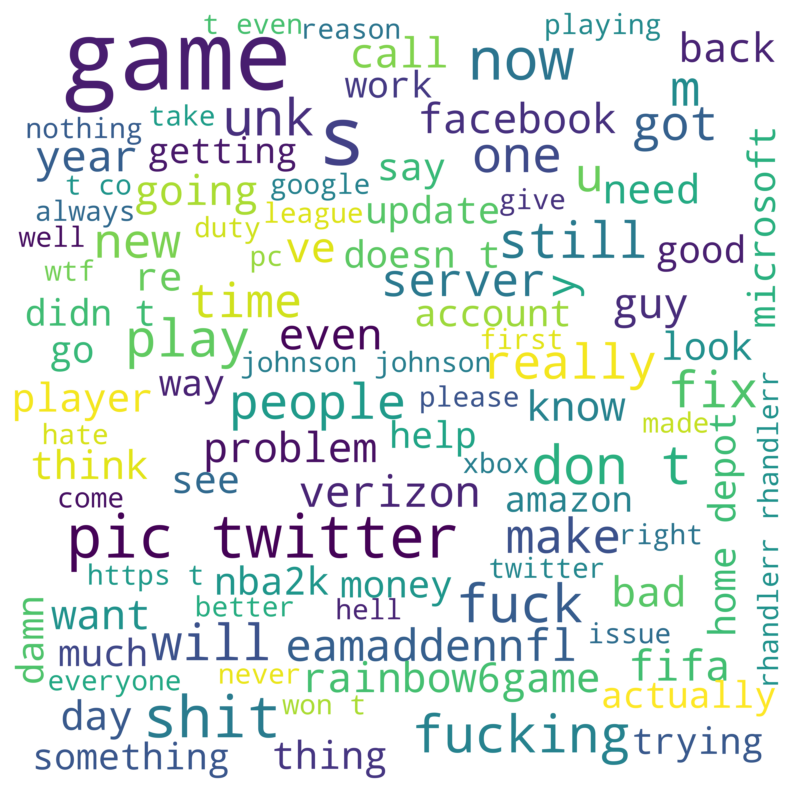

In [11]:
# creating a word cloud for type as negative
word_cloud_text = ''.join(train_data[train_data['type']=='Negative']['lower'])
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

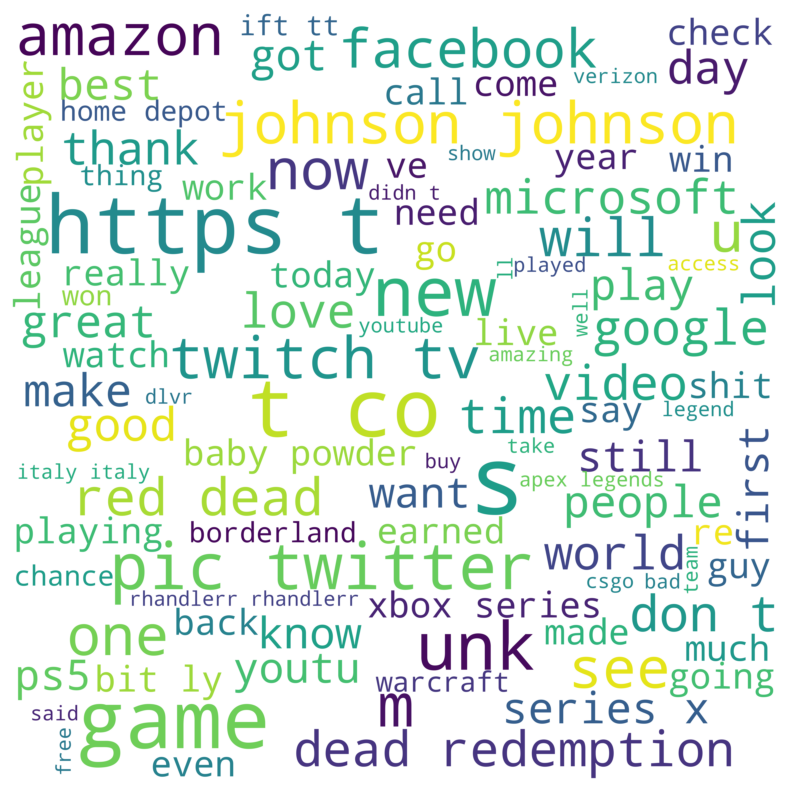

In [12]:
# creating a word cloud for type as neutral
word_cloud_text = ''.join(train_data[train_data['type']=='Neutral']['lower'])
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
train_data.groupby(['information','type']).count().reset_index()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192
...,...,...,...,...,...
123,Xbox(Xseries),Positive,792,785,792
124,johnson&johnson,Irrelevant,198,197,198
125,johnson&johnson,Negative,846,845,846
126,johnson&johnson,Neutral,1014,1013,1014


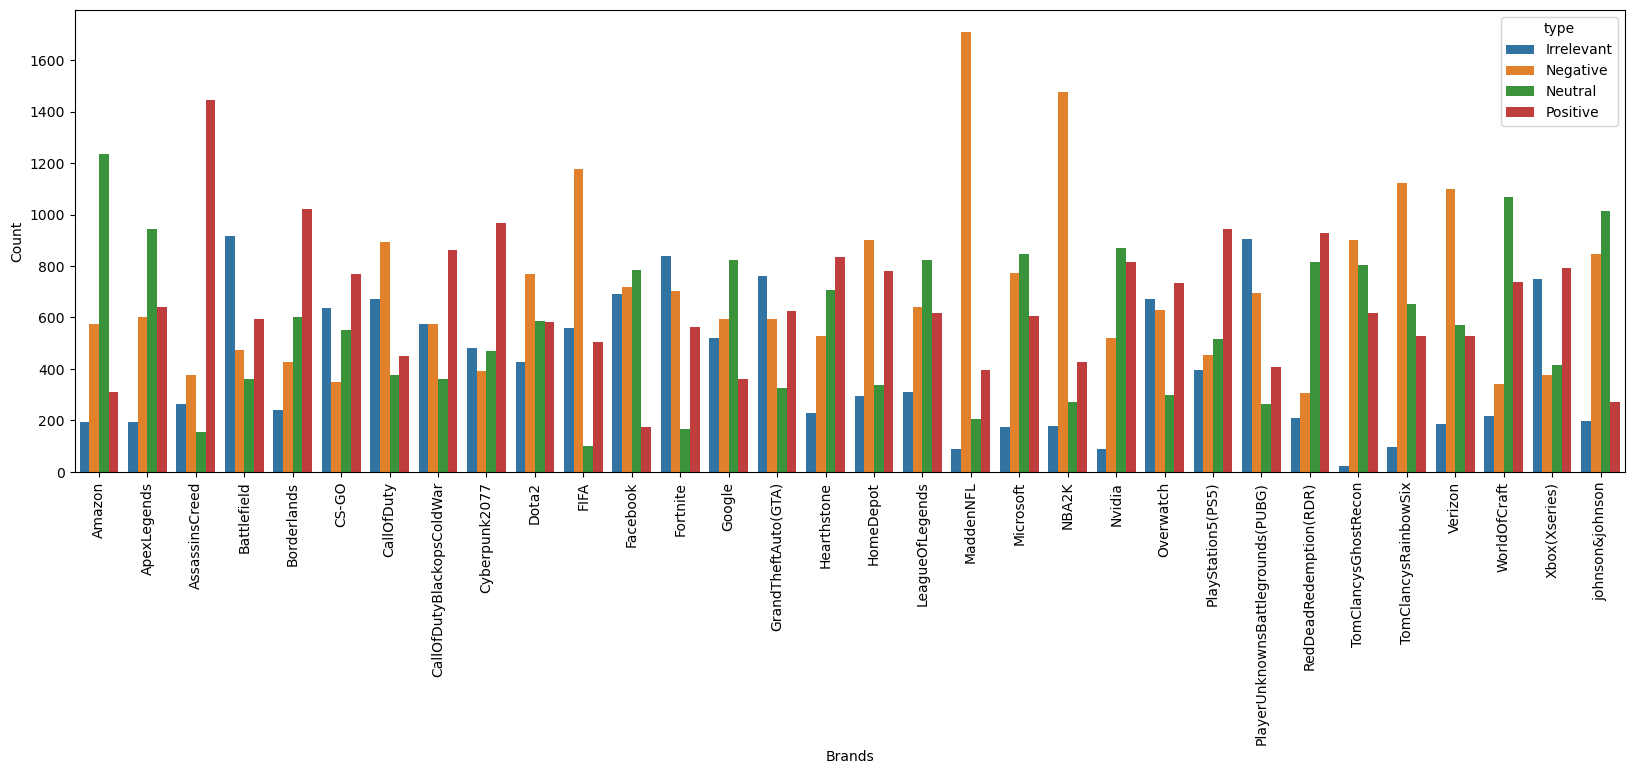

In [14]:
# frequency of type of tweets brand wise 
plt.figure(figsize=(20,6))
sns.barplot(x='information',y='id',data=train_data.groupby(['information','type']).count().reset_index(),hue='type')
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.show()

In [15]:
tokens_text = list(train_data['lower'].apply(lambda x: word_tokenize(str(x))))

In [16]:
tokens_text

[['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'coming',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  '2',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'me',
  'all'],
 ['im',
  'getting',
  'into',
  'borderlands',
  'and',
  'i',
  'can',
  'murder',
  'you',
  'all'],
 ['so',
  'i',
  'spent',
  'a',
  'few',
  'hours',
  'making',
  'something',
  'for',
  'fun',
  'if',
  'you',
  'don',
  't',
  'know',
  'i',
  'am',
  'a',
  'huge',
  'borderlands',
  'fan',
  'and',
  'maya',
  'is',
  'one',
  'of',
  'my',
  'favorite',
  'characters',
  'so',
  'i',
  'decided',
  'to',
  'make',
  'myself',
  'a',
  'wallpaper',

In [17]:
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30436


In [18]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [19]:
# storing the english stopwords in a seperate variable
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [20]:
#Initializing Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #unigrams ,(1,2) means unigram as well as bigrams,(1,3) means unigram,bigram as well as trigrams
)

In [21]:
#train test split the data
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2,random_state=0)

In [22]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

In [23]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [24]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

In [45]:
# encoding the y-labels 
le = LabelEncoder()
y_train_bow_num = le.fit_transform(y_train_bow)
y_test_bow_num=le.transform(y_test_bow)
y_val_bow_num=le.transform(y_val_bow)

In [47]:
# Logistic regression
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train_bow, y_train_bow_num)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow_num, test_pred) * 100)

Accuracy:  89.84401151502979


In [48]:
#Validation data
X_val_bow = bow_counts.transform(val_data['lower'])
y_val_bow = val_data['type']

In [49]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow_num, Val_res) * 100)

Accuracy:  98.5


In [50]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

In [57]:
model2 = LogisticRegression( C=0.9, solver="liblinear",max_iter=1500,n_jobs=-1)
model2.fit(X_train_bow, y_train_bow_num)
# Logistic regression
model2.fit(X_train_bow, y_train_bow_num)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow_num, test_pred_2) * 100)

Accuracy:  90.79467095132891


In [58]:
y_val_bow = val_data['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow_num, Val_pred_2) * 100)

Accuracy:  98.6
